The KNN Imputer is a machine learning-based imputation technique that uses the k-nearest neighbors algorithm to estimate missing values based on the values of other features in the dataset. Here are some scenarios where KNN Imputer might be suitable:

1. **Non-linear Relationships**: KNN Imputer can capture non-linear relationships between features, making it suitable for datasets where features have complex interactions.

2. **Missingness Patterns**: If the missing values in the dataset are not completely random and are related to other variables, KNN Imputer can leverage this information to impute missing values more accurately.

3. **Numerical and Categorical Data**: KNN Imputer can handle both numerical and categorical features, making it versatile for datasets with mixed data types.

4. **Small to Medium-Sized Datasets**: KNN Imputer can perform well on datasets with a moderate number of observations, where computing distances between data points is feasible.

5. **Robustness to Outliers**: KNN Imputer is generally robust to outliers, as it imputes missing values based on the nearest neighbors rather than relying on summary statistics like mean or median.
e need for tuning parameters like k when using KNN Imputer.

The KNN (K-Nearest Neighbors) imputer is a popular method for imputing missing values by using the values of neighboring data points. Here are some advantages and disadvantages of using the KNN imputer:

Advantages:

1. Utilizes Local Information: KNN imputation uses the values of the nearest neighbors to impute missing values, making it effective for capturing local patterns in the data.
  
2. Non-parametric: KNN imputation does not make assumptions about the underlying distribution of the data, making it suitable for a wide range of datasets and variable types.

3. Retains Feature Relationships: KNN imputation considers the relationships between features, which can be beneficial for preserving the structure and relationships within the data.

4. Robust to Outliers: KNN imputation is robust to outliers because it relies on the distances between data points rather than the actual values, making it suitable for datasets with outliers.

5. Flexibility in Choosing Neighbors: The number of neighbors (K) can be adjusted based on the characteristics of the dataset, providing flexibility in controlling the imputation process.

Disadvantages:

1. Computationally Intensive: KNN imputation requires calculating distances between data points, which can be computationally expensive, especially for large datasets or datasets with high dimensionality.

2. Sensitivity to Distance Metric: The choice of distance metric can significantly impact the imputation results. Different distance metrics may lead to different imputation outcomes, and choosing the appropriate metric can be challenging.

3. Handling Categorical Variables: KNN imputation is primarily designed for continuous variables and may not perform well for categorical variables without appropriate encoding or transformation.

4. Parameter Tuning: The selection of the number of neighbors (K) is crucial for the performance of KNN imputation and may require tuning through cross-validation, adding complexity to the imputation process.

5. Missingness Patterns: KNN imputation assumes that the missingness mechanism is similar to the distribution of the observed values, which may not always hold true in practice, leading to biased imputation results.

Overall, KNN imputation can be a useful method for imputing missing values, especially in scenarios where local patterns and relationships between features are important. However, careful consideration should be given to its computational complexity, parameter selection, and handling of categorical variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

data = pd.read_csv("/content/drive/MyDrive/dataset/Titanic-Dataset.csv", usecols=['Age','Pclass','Fare','Survived'])


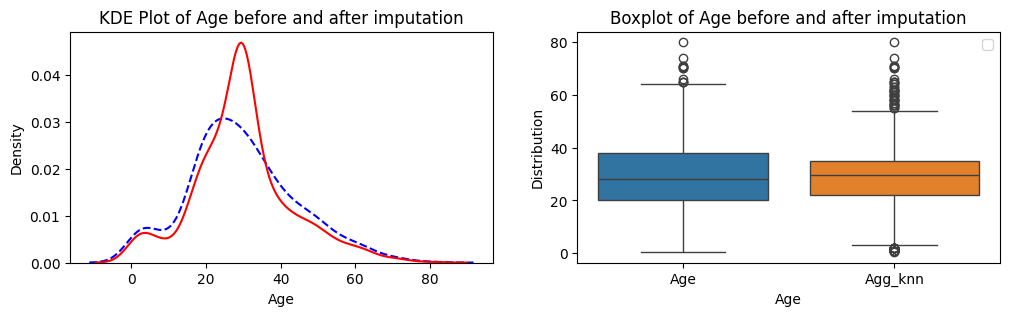

In [ ]:

imputer = KNNImputer(n_neighbors=100)

data['Agg_knn'] = imputer.fit_transform(data[['Age']])
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))

# KDE plot before and after imputation
plt.subplot(1, 2, 1)
sns.kdeplot(data['Age'], label='Original Age', color='blue', linestyle='--')
sns.kdeplot(data['Agg_knn'], label='Imputed Age (KNN)', color='red')
plt.title('KDE Plot of Age before and after imputation')
plt.xlabel('Age')
plt.ylabel('Density')

# Box plot before and after imputation
plt.subplot(1, 2, 2)
sns.boxplot(data=[data['Age'], data['Agg_knn']])
plt.title('Boxplot of Age before and after imputation')
plt.xlabel('Age')
plt.ylabel('Distribution')

plt.legend()
plt.show()


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/dataset/Titanic-Dataset.csv", usecols=['Age','Pclass','Fare','Survived'])
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [ ]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

![01.png](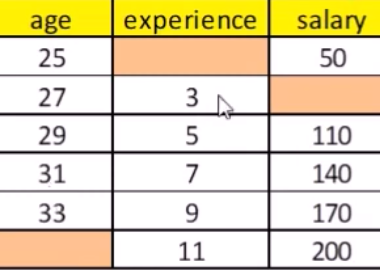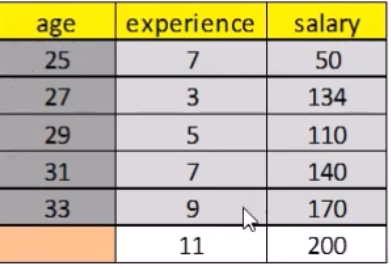)

<b>Step 1:</b> A simple imputation, such as imputing the mean, is performed for every missing value in the dataset. These mean imputations can be thought of as “place holders.”

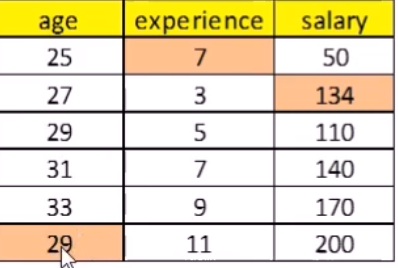![image.png](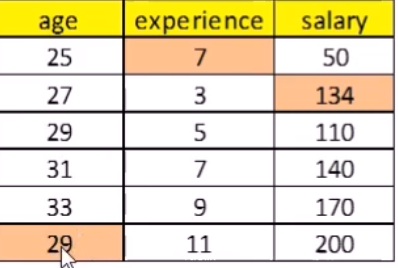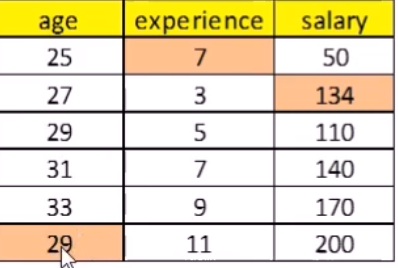)

<b>Step 2:</b> Start Step 2 with the variable with the fewest number of missing values. The “place holder” mean imputations for one variable (“var”) are set back to missing.

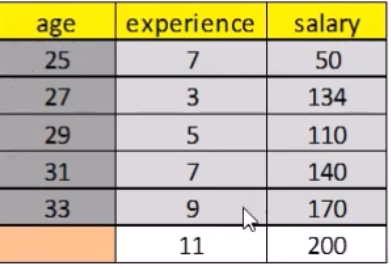

<b>Step 3:</b> “var” is the dependent variable in a regression model and all the other variables are independent variables in the regression model.

<b>Step 4:</b> The missing values for “var” are then replaced with predictions (imputations) from the regression model. When “var” is subsequently used as an independent variable in the regression models for other variables, both the observed and these imputed values will be used.

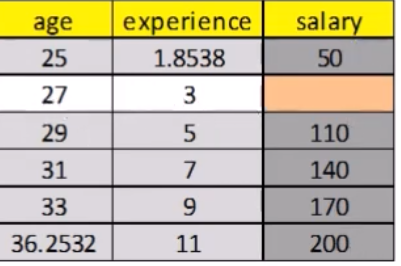

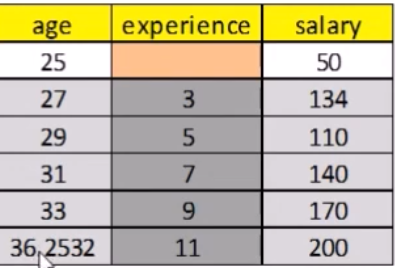

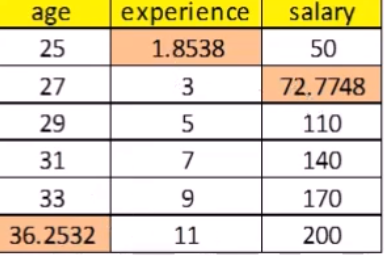

<b>Step 5:</b>Moving on to the next variable with the next fewest missing values, steps 2–4 are then repeated for each variable that has missing data. The cycling through each of the variables constitutes one iteration or “cycle.” At the end of one cycle all of the missing values have been replaced with predictions from regressions that reflect the relationships observed in the data.

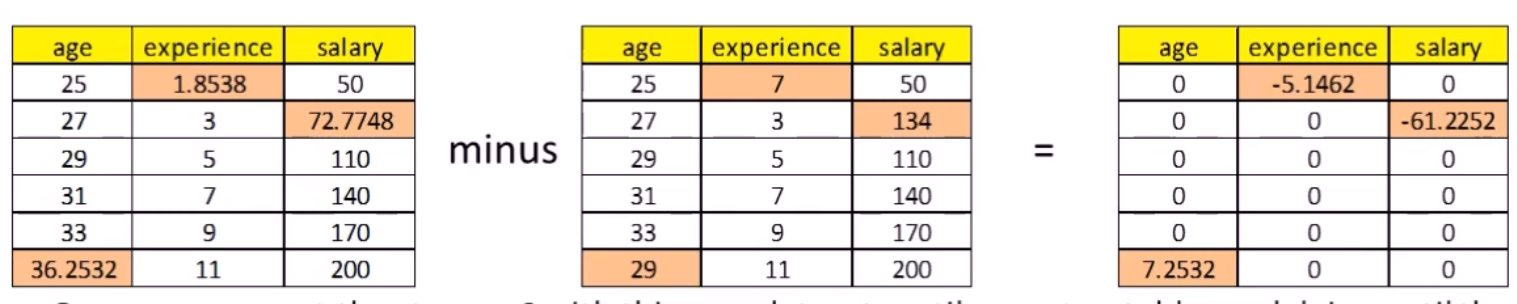

<b>Step 6:</b>Steps 2 through 4 are repeated for a number of cycles, with the imputations being updated at each cycle. The idea is that by the end of the cycles the distribution of the parameters governing the imputations (e.g., th

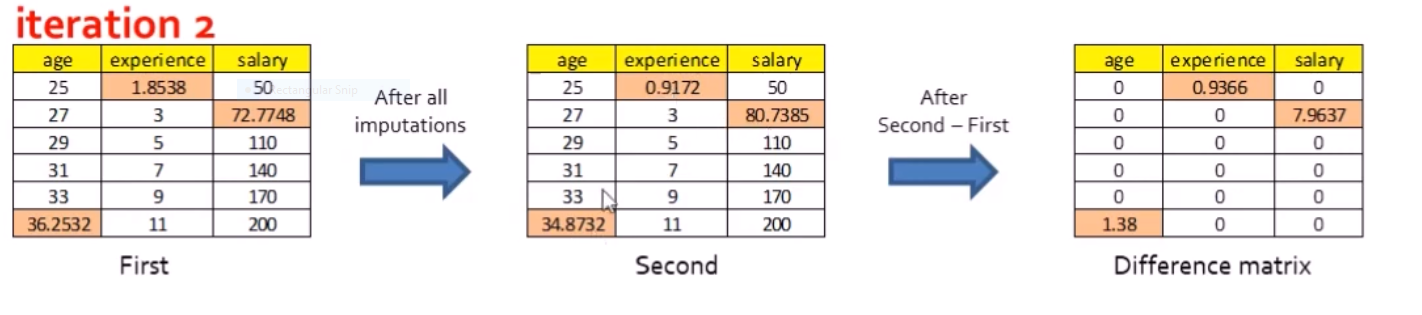

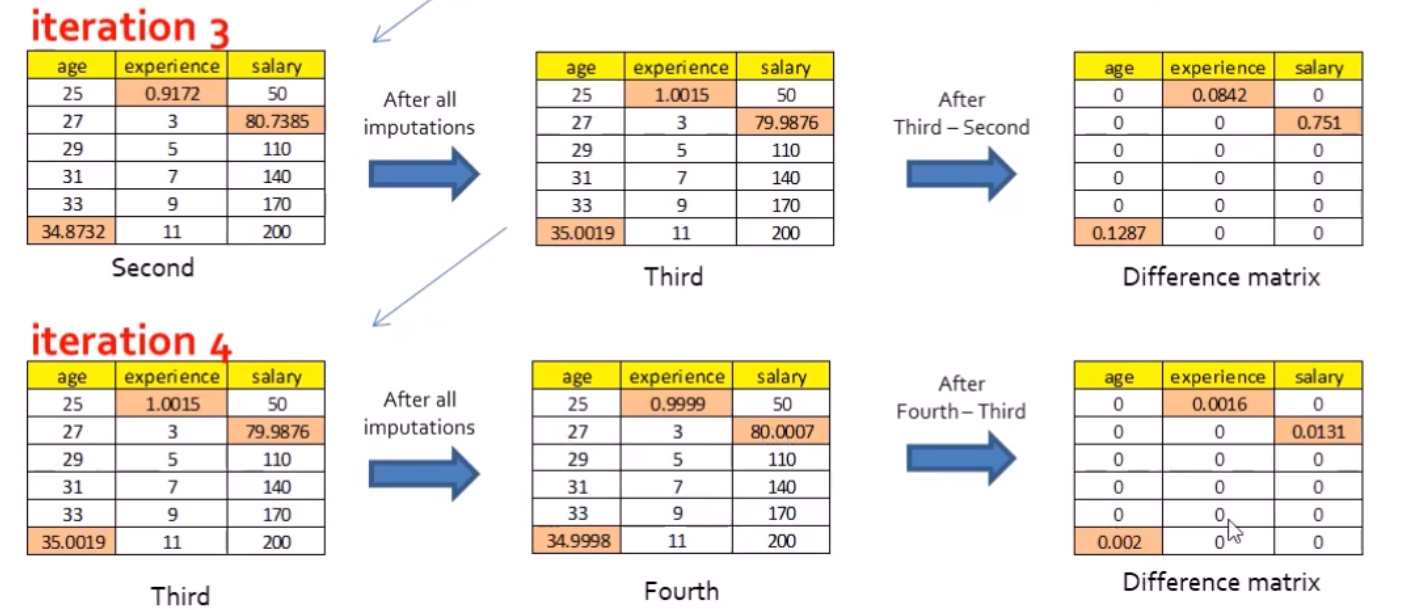

This entire process of iterating through the three variables

would be repeated until some measure of convergence, where the imputations are stable; the observed data and the final set of imputed values would then constitute one “complete” data set.

We then repeat this whole process multiple times in order to get multiple imputations.